# Algorithms 1: Davenport "Solution"

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

**Which constellation is a given point in?**

A simplified approach from [Roman 1987](http://cdsads.u-strasbg.fr/abs/1987PASP...99..695R):
http://vizier.cfa.harvard.edu/viz-bin/Cat?VI/42#sRM2.1

In [2]:
def constel_numpy(x,y):
    '''
    Determine which constellation a set of coordinates is located in. 
    Based on the algorithm from N. G. Roman 1987, PASP, 99, 695
    
    This version uses Numpy arrays, and can operate on either a single (x,y) coordinate, 
    or a list of coordinates.
    
    Parameters
    ----------
    x : float or float array
        Right Ascension (RA) of target, in decimal hours in the range [0, 24]
    y : float or float array
        Declination (Dec) of target, in decimal degrees in the range [-90, 90]

    Returns
    -------
    string or string array
        Abbreviation of constellation for each set of coordinates
    '''
    
    # read the data in every time (runtime overhead....)
    RAl, RAu, Decl = np.loadtxt('data/data.txt', delimiter=',', usecols=(0,1,2), unpack=True)
    names = np.loadtxt('data/data.txt', delimiter=',', usecols=(3,), unpack=True, dtype='str')
    
    # handle lists of coordinates
    if np.size(x) > 1:
        outname = []

        for k in range(np.size(x)):

            c1 = np.where((Decl <= y[k]))

            c2 = np.where((RAu[c1] > x[k]))

            c3 = np.where((RAl[c1][c2] <= x[k]))

            outname = np.append(outname, names[c1][c2][c3][0])

        return outname

    # handle old-fashioned single coordinate case
    else:
        c1 = np.where((Decl <= y))

        c2 = np.where((RAu[c1] > x))

        c3 = np.where((RAl[c1][c2] <= x))

        return names[c1][c2][c3][0]

In [3]:
# vega
ra=18.62
dec=38.78

constel_numpy(ra,dec)

'LYR'

In [4]:
# HD 129078 
ra=14.78
dec=-79.03

constel_numpy(ra,dec)

'APS'

In [5]:
ra = [18.62, 14.78]
dec = [38.78, -79.03]

constel_numpy(ra,dec)

array(['LYR', 'APS'], 
      dtype='|S32')

## How does it work?!


(0, 24)

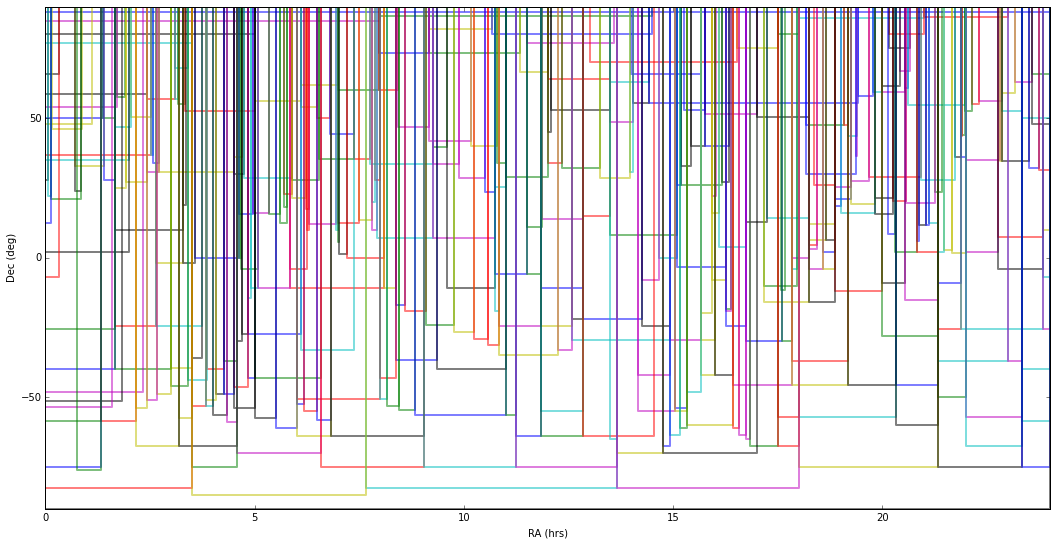

In [6]:
RAl, RAu, Decl = np.loadtxt('data/data.txt', delimiter=',', usecols=(0,1,2), unpack=True)
names = np.loadtxt('data/data.txt', delimiter=',', usecols=(3,), unpack=True, dtype='str')


plt.figure(figsize=(18,9))
for k in range(len(RAl)):
    plt.plot([RAl[k], RAl[k], RAu[k], RAu[k]], [90, Decl[k], Decl[k], 90], lw=2, alpha=0.5)

plt.xlabel('RA (hrs)')
plt.ylabel('Dec (deg)')
plt.ylim([-90,90])
plt.xlim([0,24])

In [7]:
# the list of actual constellation names
oabbv, onames = np.loadtxt('data/const-names.txt', delimiter=',', unpack=True, usecols=(0,1), dtype='str')
oabbv

array(['AND', 'ANT', 'APS', 'AQR', 'AQL', 'ARA', 'ARI', 'AUR', 'BOO',
       'CAE', 'CAM', 'CNC', 'CVN', 'CMA', 'CMI', 'CAP', 'CAR', 'CAS',
       'CEN', 'CEP', 'CET', 'CHA', 'CIR', 'COL', 'COM', 'CRA', 'CRB',
       'CRV', 'CRT', 'CRU', 'CYG', 'DEL', 'DOR', 'DRA', 'EQU', 'ERI',
       'FOR', 'GEM', 'GRU', 'HER', 'HOR', 'HYA', 'HYI', 'IND', 'LAC',
       'LEO', 'LMI', 'LEP', 'LIB', 'LUP', 'LYN', 'LYR', 'MEN', 'MIC',
       'MON', 'MUS', 'NOR', 'OCT', 'OPH', 'ORI', 'PAV', 'PEG', 'PER',
       'PHE', 'PIC', 'PSC', 'PSA', 'PUP', 'PYX', 'RET', 'SGE', 'SGR',
       'SCO', 'SCL', 'SCT', 'SER1', 'SER2', 'SEX', 'TAU', 'TEL', 'TRI',
       'TRA', 'TUC', 'UMA', 'UMI', 'VEL', 'VIR', 'VOL', 'VUL'], 
      dtype='|S19')

(15, 24)

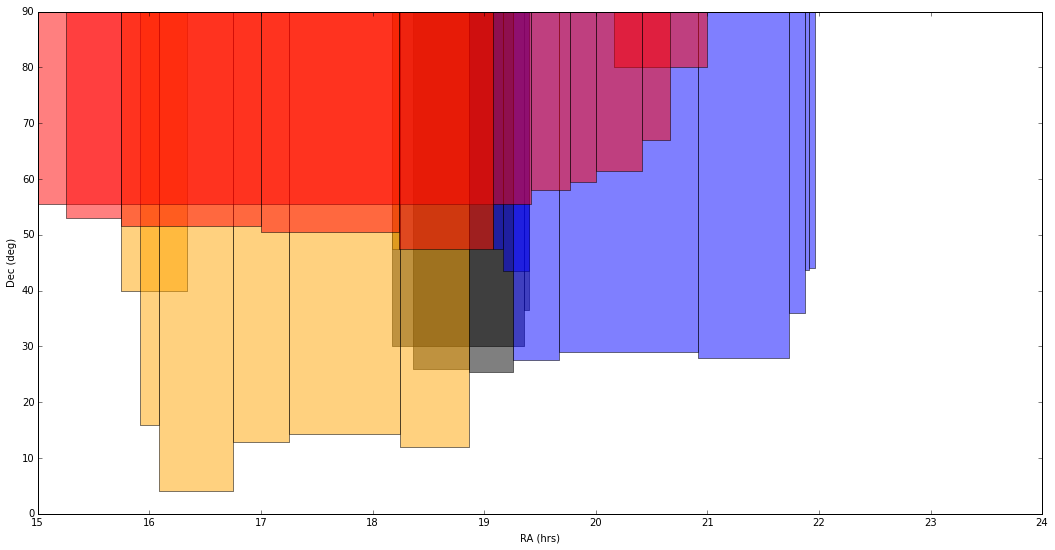

In [8]:
fig = plt.figure(figsize=(18,9))

ax1 = fig.add_subplot(111)

ok = np.where((names == 'LYR'))
for k in range(len(ok[0])):
    ax1.add_patch(patches.Rectangle((RAl[ok][k], Decl[ok][k]), RAu[ok][k]-RAl[ok][k], 90-Decl[ok][k], 
                                    ec=None, alpha=0.5, color='k'))

ok = np.where((names == 'CYG'))
for k in range(len(ok[0])):
        ax1.add_patch(patches.Rectangle((RAl[ok][k], Decl[ok][k]), RAu[ok][k]-RAl[ok][k], 90-Decl[ok][k], 
                                    ec=None, alpha=0.5, color='blue'))

ok = np.where((names == 'HER'))
for k in range(len(ok[0])):
        ax1.add_patch(patches.Rectangle((RAl[ok][k], Decl[ok][k]), RAu[ok][k]-RAl[ok][k], 90-Decl[ok][k], 
                                    ec=None, alpha=0.5, color='orange'))

ok = np.where((names == 'DRA'))
for k in range(len(ok[0])):
    ax1.add_patch(patches.Rectangle((RAl[ok][k], Decl[ok][k]), RAu[ok][k]-RAl[ok][k], 90-Decl[ok][k], 
                                    ec=None, alpha=0.5, color='red'))

plt.xlabel('RA (hrs)')
plt.ylabel('Dec (deg)')
plt.ylim([0,90])
plt.xlim([15,24])